In [2]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import html
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()

In [4]:
table = pd.read_csv('flipkart_com-ecommerce_sample.csv')
table

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
table2 = pd.read_csv('E-commerce.csv')
table2

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14053,19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
14054,19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
14055,19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
14056,19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite C

In [4]:
table.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [13]:
table.shape

(20002, 15)

In [14]:
table.info

<bound method DataFrame.info of                                 uniq_id            crawl_timestamp   
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000  \
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   
20000                               NaN                        NaN   
20001                               NaN                        NaN   

                                             product_url   
0      http://www.flipkart.com/alisha-solid-women-s-c...  \
1      

In [15]:
pd.isnull(table)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [16]:
pd.isnull(table).sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [17]:
table.dropna(inplace = True)

In [18]:
table.shape

(14058, 15)

In [20]:
table

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [13]:
table.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [14]:
table.describe()

,retail_price,discounted_price
count,14058.000000,14058.000000
mean,3640.462939,2419.567222
std,9272.175892,6949.478890
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1100.000000,549.000000
75%,2199.000000,1239.750000
max,250500.000000,162825.000000


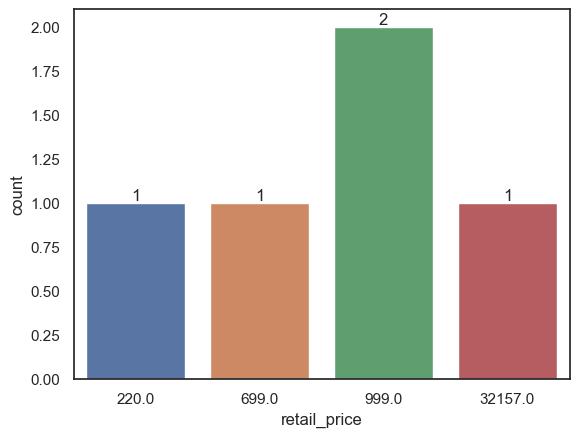

In [12]:
sns.set_style('white')
ax = sns.countplot(x = 'retail_price',data = table.head())

for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
table.to_csv('E-commerce.csv')

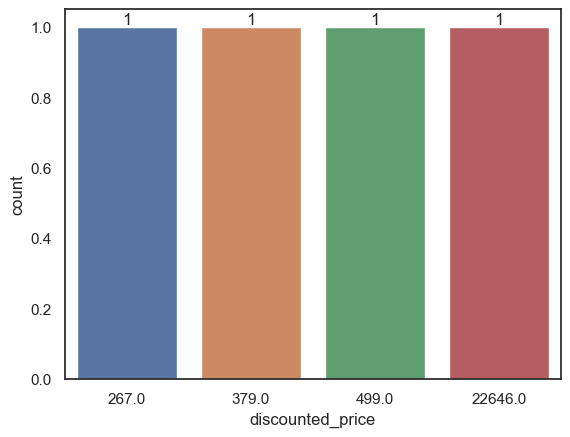

In [10]:
sns.set_style('white')
ax = sns.countplot(x = 'discounted_price',data = table.head(4))

for bars in ax.containers:
    ax.bar_label(bars)

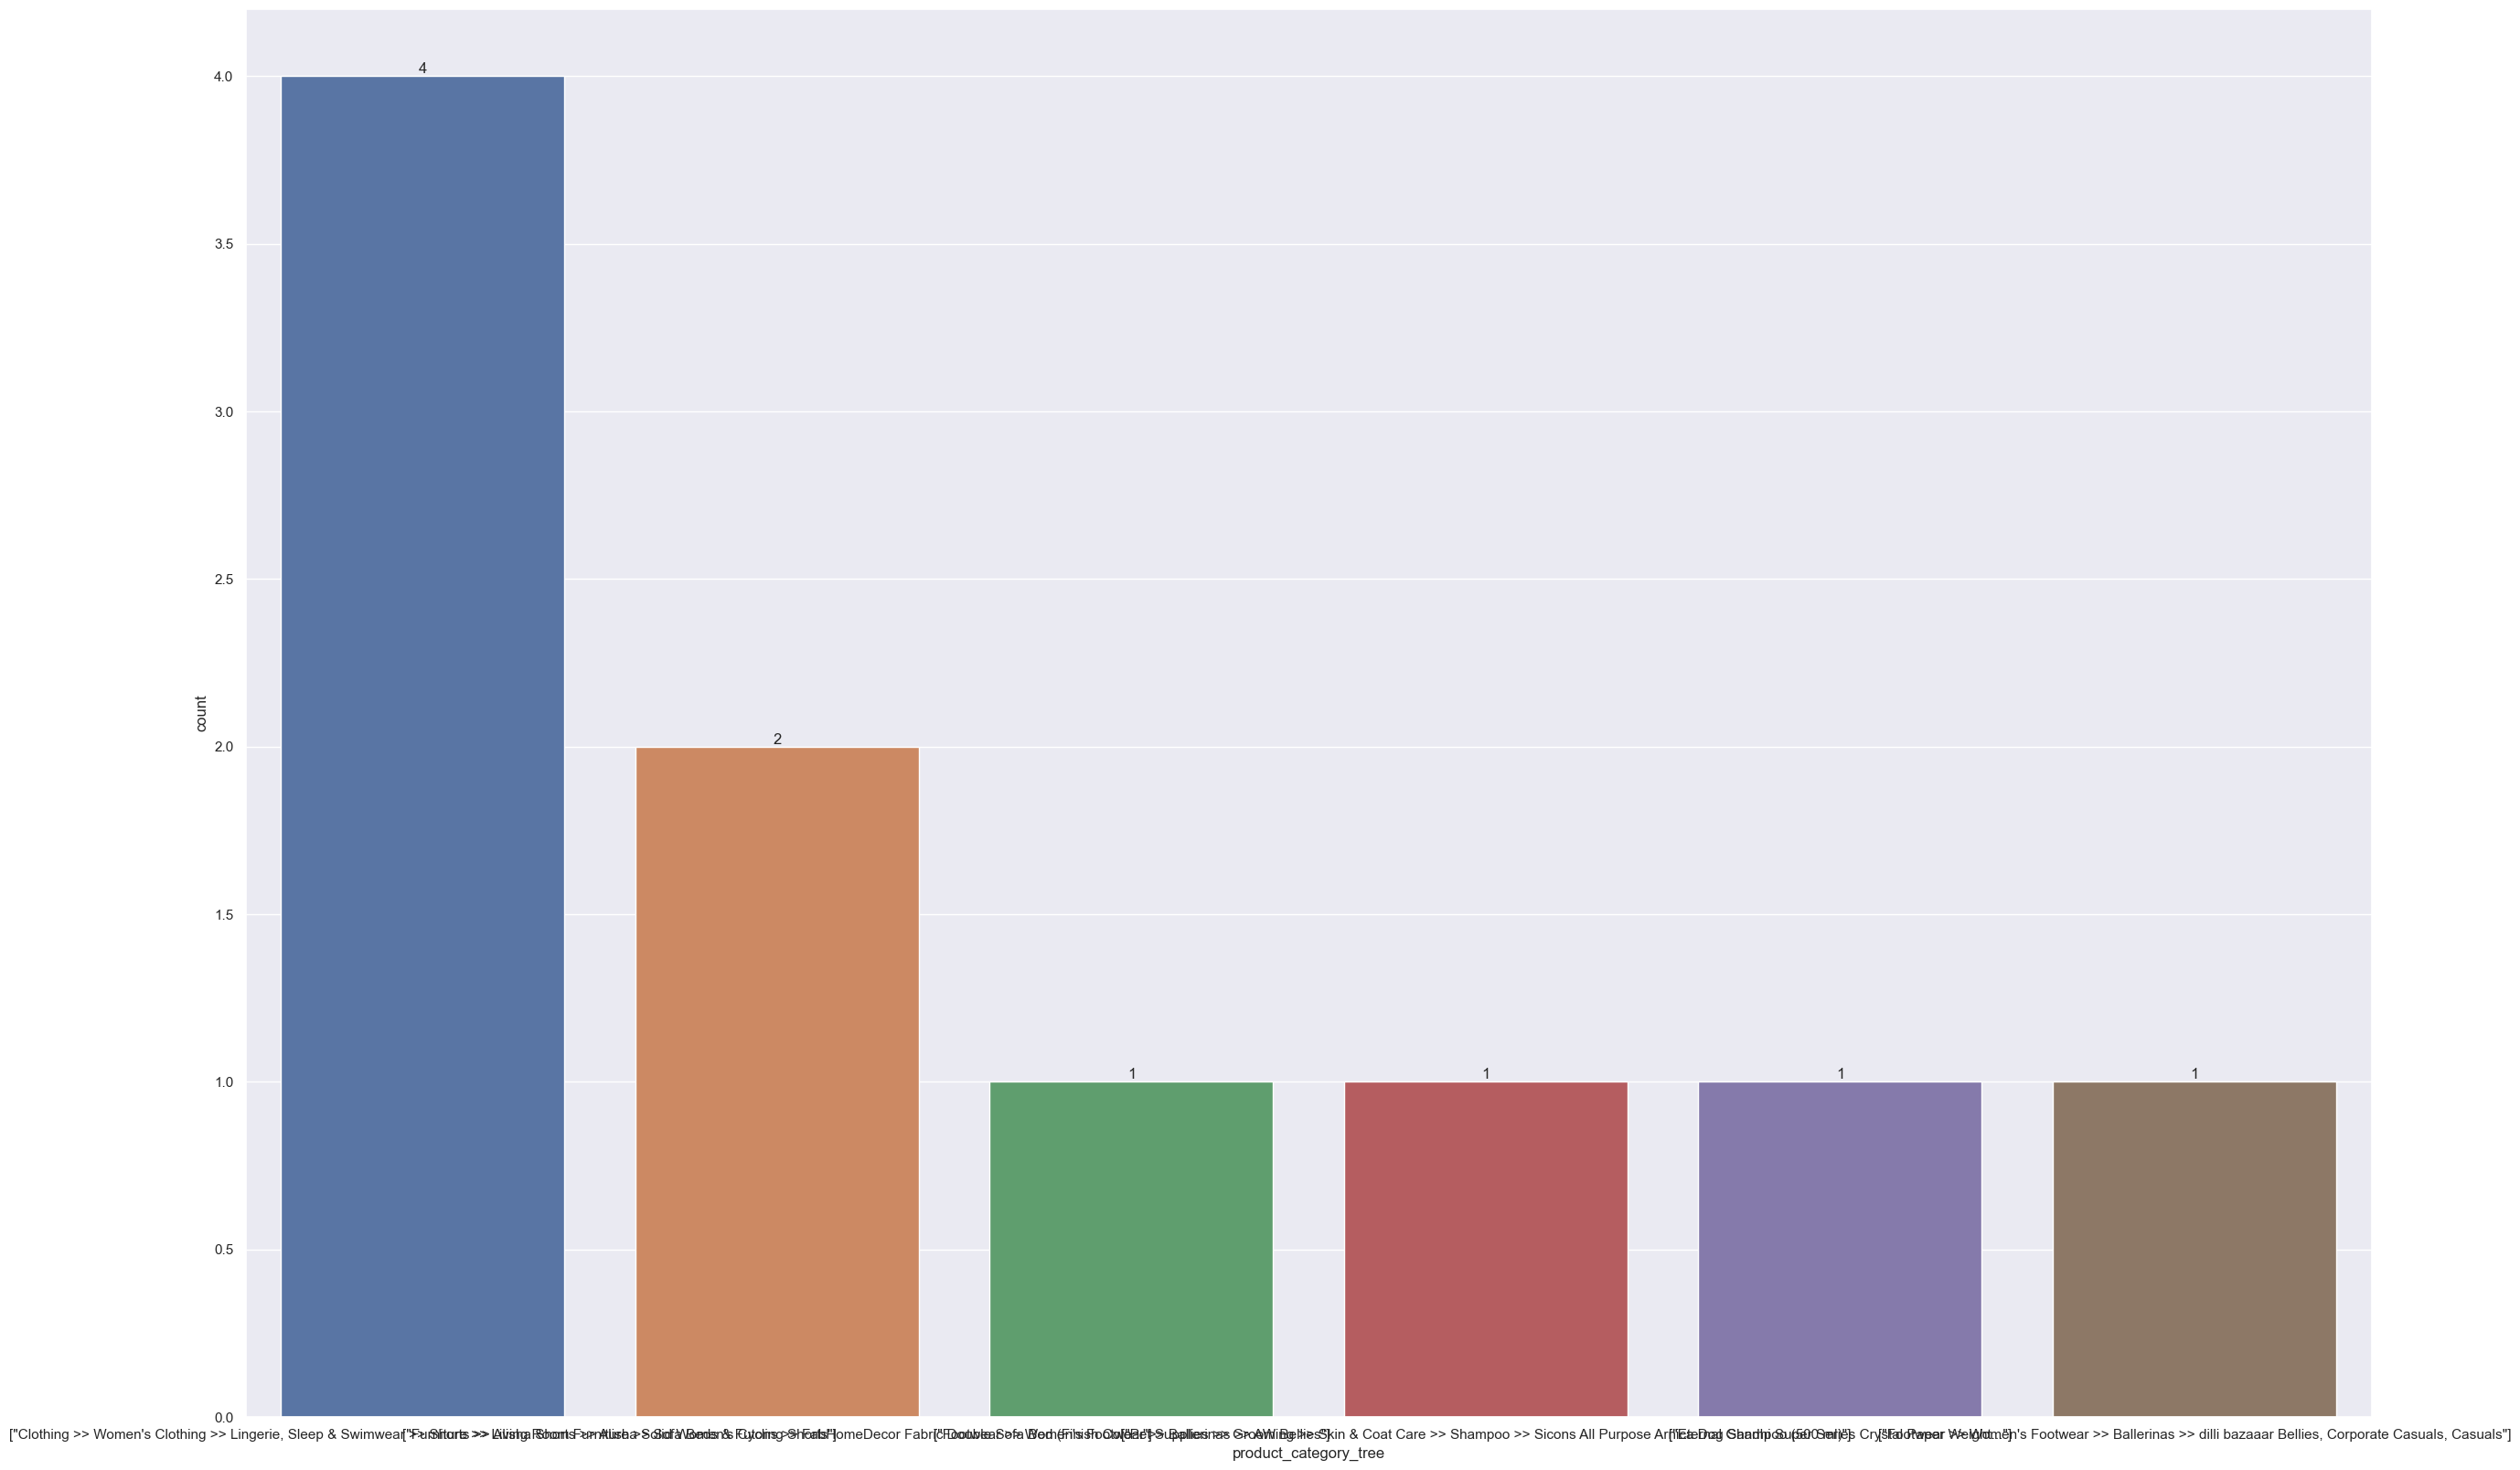

In [26]:
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.countplot(data = table.head(10), x = 'product_category_tree')

for bars in ax.containers:
    ax.bar_label(bars)

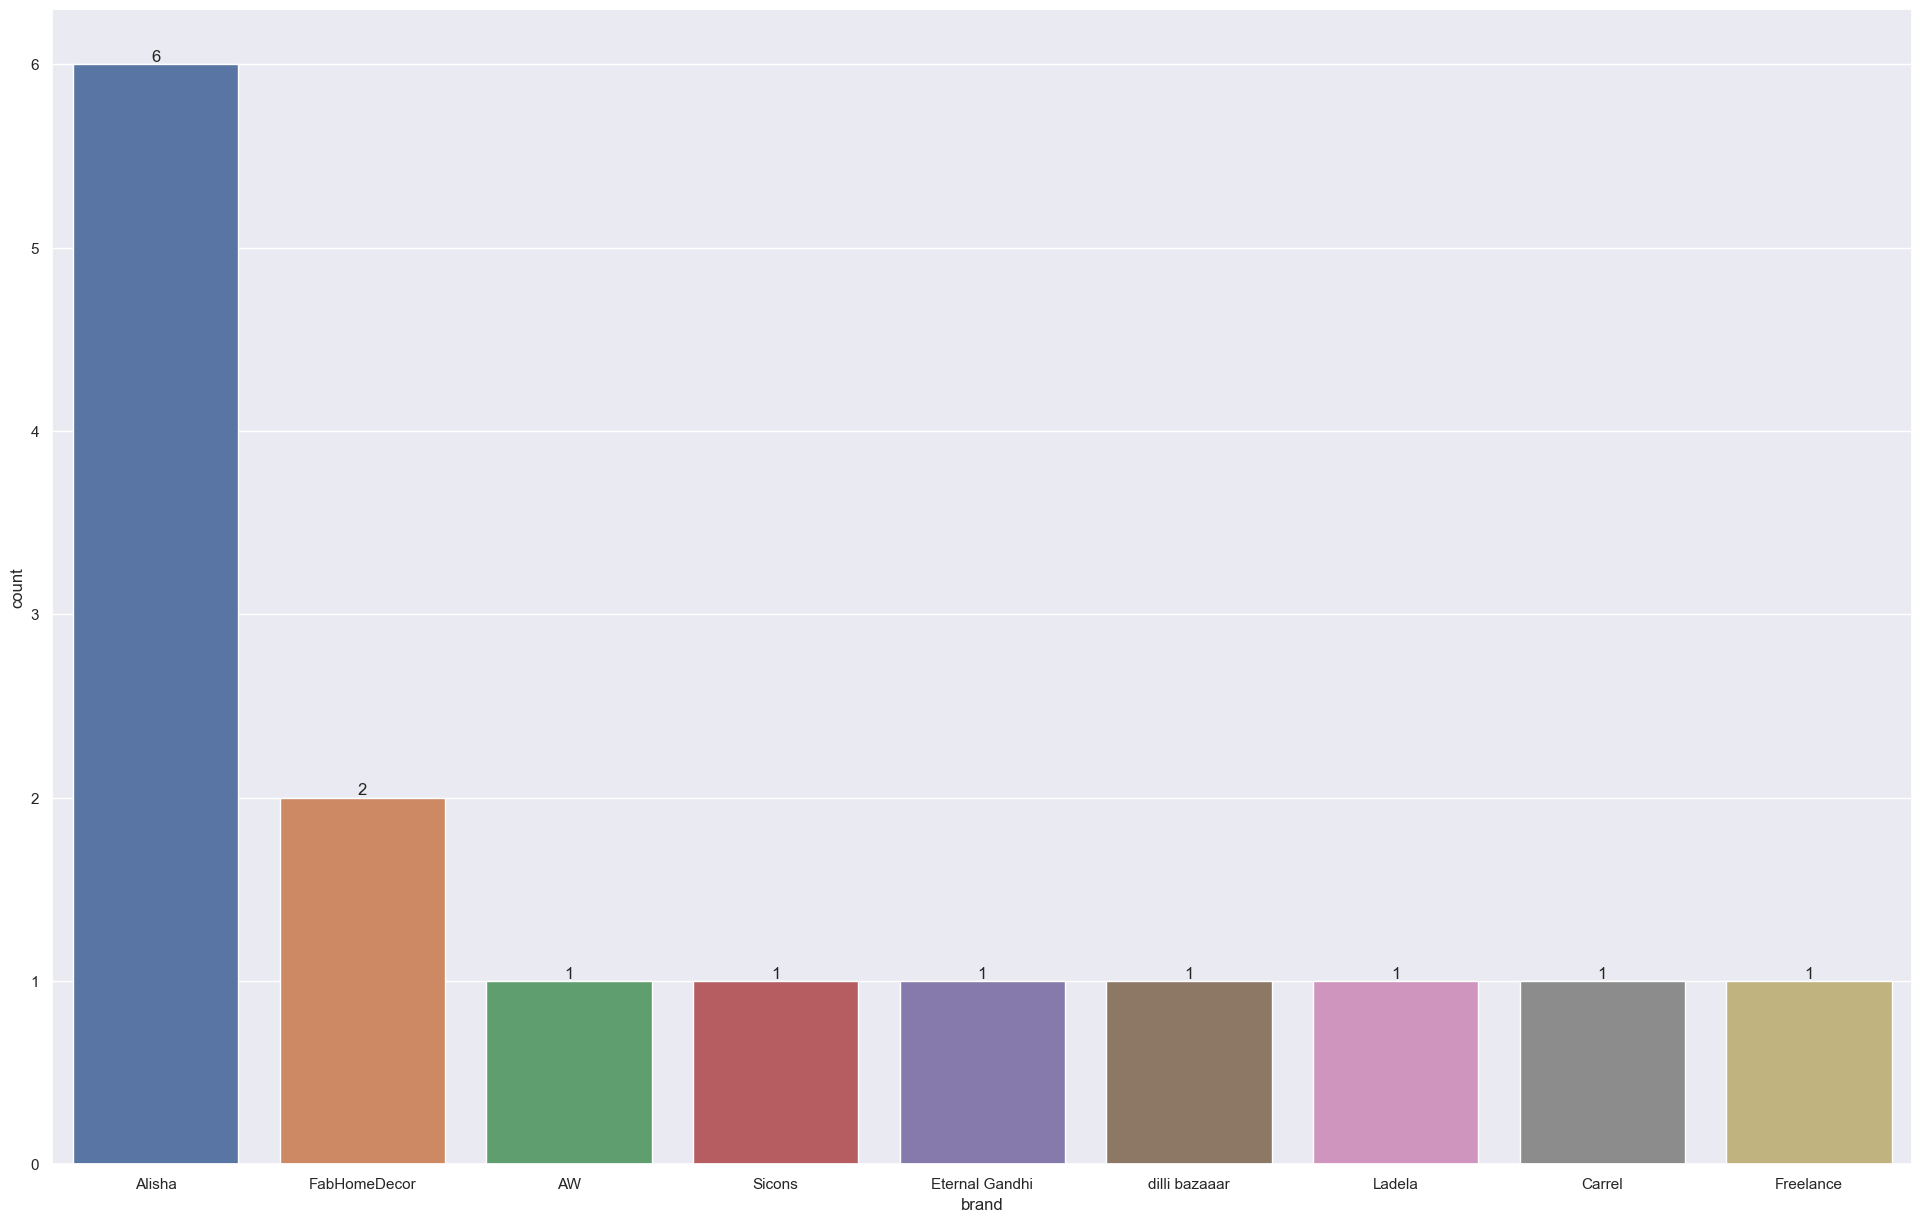

In [34]:
sns.set(rc={'figure.figsize':(24,15)})
ax = sns.countplot(data = table.head(15), x = 'brand')

for bars in ax.containers:
    ax.bar_label(bars)

ValueError: could not convert string to float: 'c2d766ca982eca8304150849735ffef9'

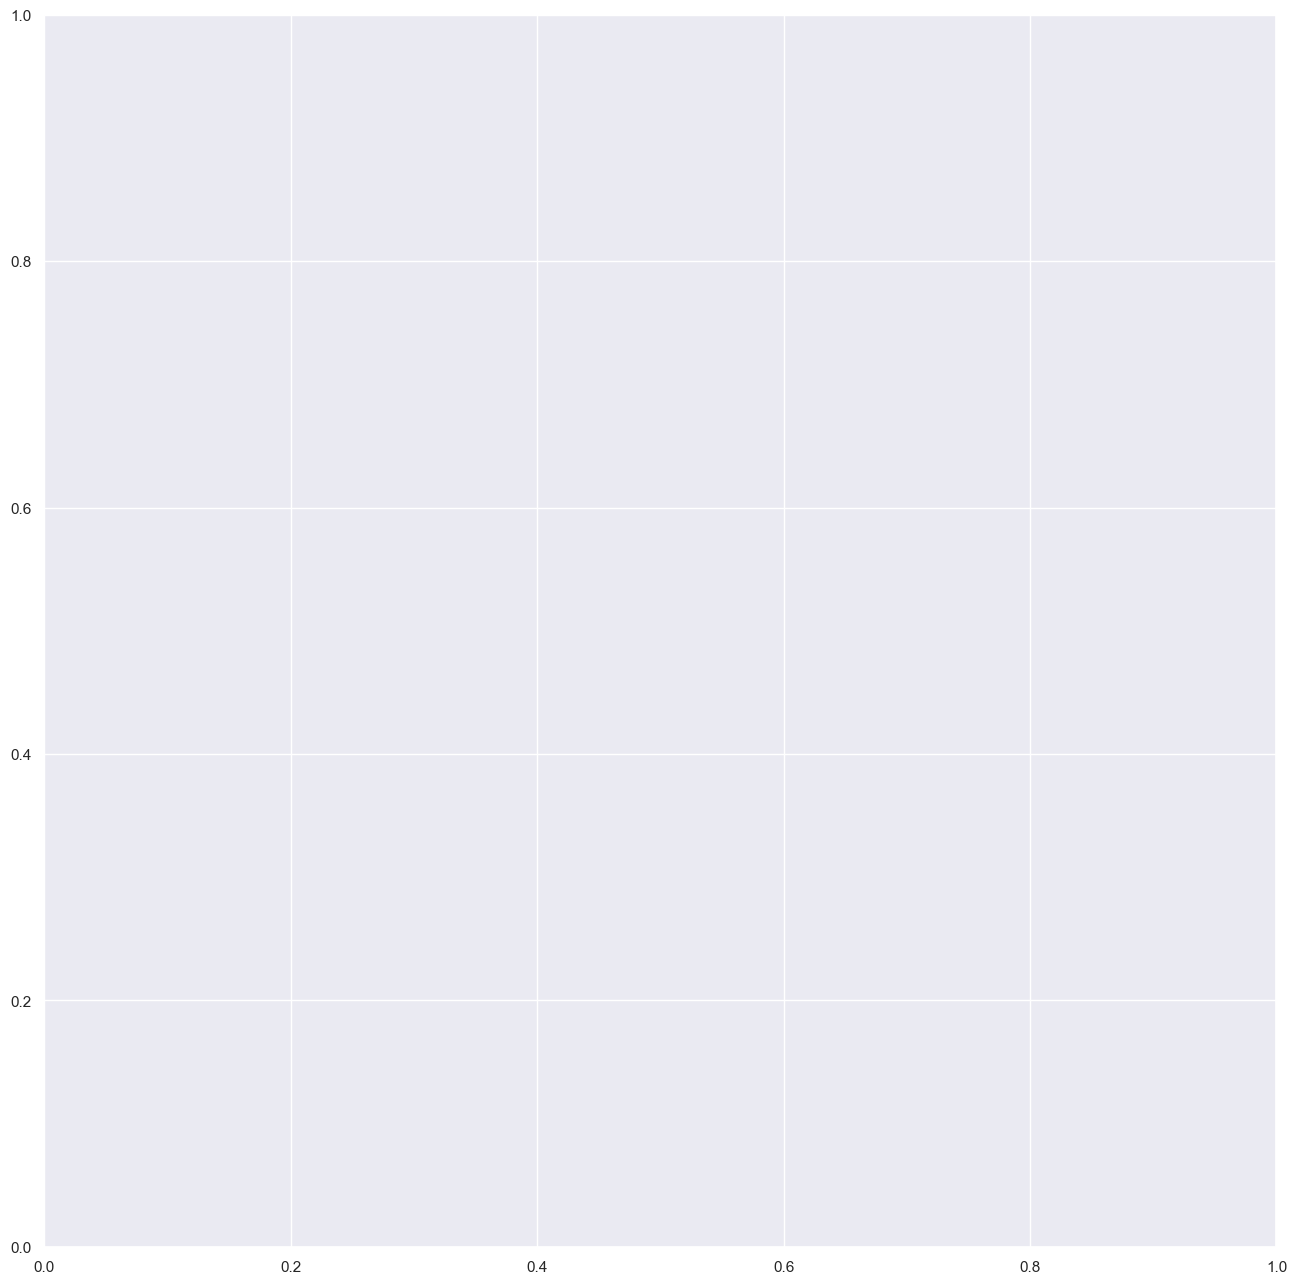

In [38]:
plt.figure(figsize=(16, 16))
plt.pie(table, labels=distinct_count, autopct='%1.1f%%', startangle=140)  # autopct formats the percentage values



In [36]:
distinct_count = table['product_name'].nunique()
distinct_count



8884

In [45]:
Product = table.groupby(['product_name'], as_index=False)['discounted_price'].sum().sort_values(by='discounted_price', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = table, x = 'product_name',y= 'discounted_price')


KeyboardInterrupt



In [43]:
ax = sns.countplot(data = table, x = 'pid')

sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Error in callback <function flush_figures at 0x0000018954D08EE0> (for post_execute):



KeyboardInterrupt



In [44]:
table['product_name'].nunique()


8884

<Axes: xlabel='pid'>

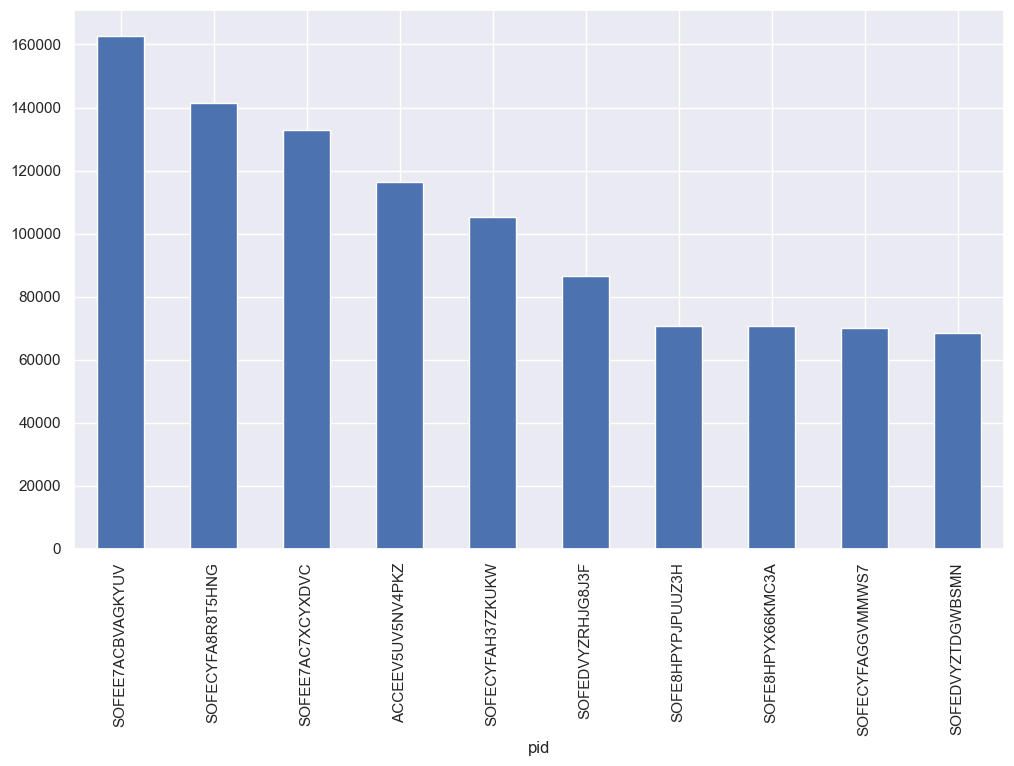

In [49]:
#Top 10 orders by date
fig1, ax1 = plt.subplots(figsize=(12,7))
table.groupby('pid')['discounted_price'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')